<a href="https://colab.research.google.com/github/cabb1808/ProyectoSenales3/blob/main/Proyecto_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [102]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
import scipy as sp


In [103]:
!wget 'https://raw.githubusercontent.com/cabb1808/ProyectoSenales3/main/TRM.csv' -O 'TRM.csv'

--2023-06-07 22:34:49--  https://raw.githubusercontent.com/cabb1808/ProyectoSenales3/main/TRM.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 220043 (215K) [text/plain]
Saving to: ‘TRM.csv’

TRM.csv             100%[===================>] 214.89K  --.-KB/s    in 0.03s   

2023-06-07 22:34:50 (8.01 MB/s) - ‘TRM.csv’ saved [220043/220043]



In [104]:
#Importamos la database y ordenamos en orden cronologico ya que no lo está

data = pd.read_csv('TRM.csv')
# Convertir la columna de fechas al formato de fecha adecuado
data['VIGENCIADESDE'] = pd.to_datetime(data['VIGENCIADESDE'], format='%d/%m/%Y')

# Ordenar los datos por fecha
data.sort_values(by='VIGENCIADESDE', inplace=True)
datos = data[['VIGENCIADESDE', 'VALOR']]

datos['VIGENCIADESDE'] = pd.to_datetime(datos['VIGENCIADESDE'])
datos = datos.set_index('VIGENCIADESDE')

d = datos.resample('D').asfreq()


d['VALOR'].fillna(method='ffill', inplace=True)

print(d)

                 VALOR
VIGENCIADESDE         
1991-12-02      643.42
1991-12-03      639.22
1991-12-04      635.70
1991-12-05      631.51
1991-12-06      627.16
...                ...
2022-07-16     4395.63
2022-07-17     4395.63
2022-07-18     4395.63
2022-07-19     4315.41
2022-07-20     4303.34

[11189 rows x 1 columns]


<ipython-input-104-08c0800670b4>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datos['VIGENCIADESDE'] = pd.to_datetime(datos['VIGENCIADESDE'])


(10629, 1)


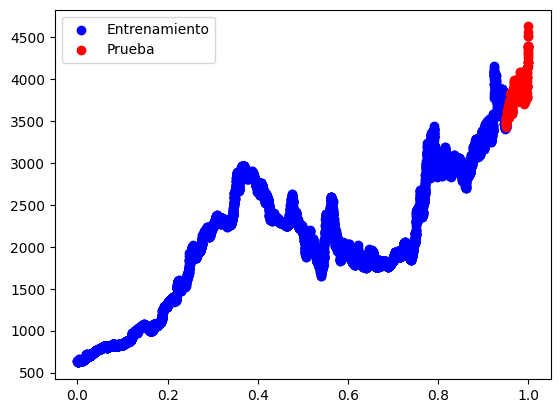

In [105]:
#Creamos un vector temporal y separamos los datos en train y test


xs = np.linspace(0, 1, len(d))
X_train, X_test, y_train, y_test = train_test_split(xs, d['VALOR'], test_size=0.05,shuffle=False)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

print(X_train.shape)

plt.scatter(X_train, y_train, color='blue', label='Entrenamiento')
plt.scatter(X_test, y_test, color='red', label='Prueba')
plt.xlabel('')
plt.ylabel('')
plt.title('')
plt.legend()


In [182]:
def MapeoDataset(X,K):
    # # Extraer caracteristicas sinusoidales
    # # X: N x D, vector de entradas 
    # # K: escalar, grado del polinomio
    # # return: N x (K+1), matriz de características Phi 
    X = X.flatten()
    N = X.shape[0]
    
    #inicializar Phi
    Phi = np.ones((N, K+1))
    mu = np.linspace(0,10,K)
    sig2 = 0.1

    # Calcular matriz Phi
    for n in range(len(X)):
      for k in range(1, K+1):
        Phi[n,k] = np.exp(-(mu[k-1] - X[n])**2/sig2) 
    return Phi

[[1.00000000e+000 1.00000000e+000 1.63737713e-007 ... 5.12099002e-245
  0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 9.99999920e-001 1.64103987e-007 ... 5.19011018e-245
  0.00000000e+000 0.00000000e+000]
 [1.00000000e+000 9.99999680e-001 1.64471054e-007 ... 5.26016244e-245
  0.00000000e+000 0.00000000e+000]
 ...
 [1.00000000e+000 1.20895370e-004 4.06002935e-001 ... 4.60880460e-187
  5.74767816e-265 0.00000000e+000]
 [1.00000000e+000 1.20690275e-004 4.06220864e-001 ... 4.66308771e-187
  5.82838427e-265 0.00000000e+000]
 [1.00000000e+000 1.20485508e-004 4.06438846e-001 ... 4.71800942e-187
  5.91022267e-265 0.00000000e+000]]


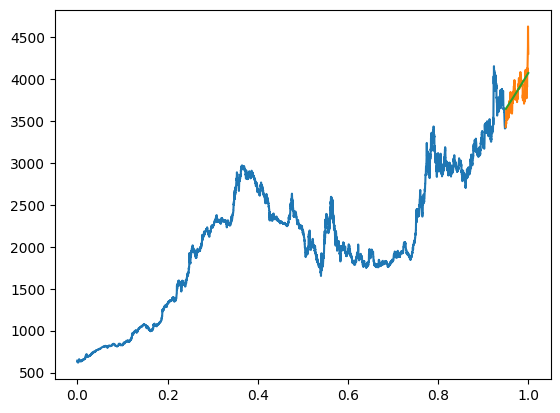

In [183]:
M=9


lam=0.001
PHI_train = MapeoDataset(X_train,M)
PHI_test = MapeoDataset(X_test,M)
print(PHI_train)
w_Regresion = np.linalg.inv(((PHI_train.T)@PHI_train) + (lam*np.eye(M+1)))@((PHI_train.T)@y_train)
y_pred1 = PHI_train@w_Regresion
y_pred2= PHI_test@w_Regresion

# Imprimir las predicciones
plt.plot(X_train,y_train)
plt.plot(X_test,y_test)
plt.plot(X_test,y_pred2)


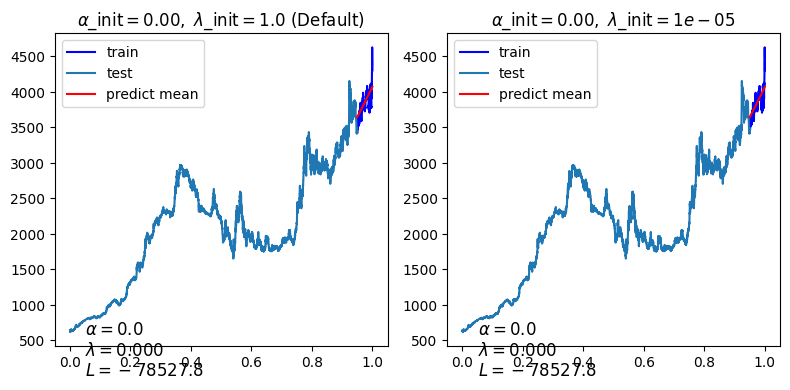

In [184]:
from sklearn.linear_model import BayesianRidge


reg = BayesianRidge(tol=1e-6, fit_intercept=False, compute_score=True)
n_order = 3
# X_train = np.vander(X_train, n_order + 1, increasing=True)  #cambiar por phi
# X_test = np.vander(X_test, n_order + 1, increasing=True)

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
for i, ax in enumerate(axes):
    # Bayesian ridge regression with different initial value pairs
    if i == 0:
        init = [1 / np.var(y_train), 1.0]  # Default values
    elif i == 1:
        init = [0.001, 1e-5]
        reg.set_params(alpha_init=init[0], lambda_init=init[1])
    reg.fit(PHI_train, y_train)

    y_pred_train = reg.predict(PHI_train, return_std=False)
    y_pred_test = reg.predict(PHI_test, return_std=False)


    ax.plot(X_test, y_test, color="blue", label="train")
    ax.plot(X_train, y_train, label="test")
    ax.plot(X_test, y_pred_test, color="red", label="predict mean")

    # ax.fill_between(X_test, ymean - ystd, ymean + ystd, color="pink", alpha=0.5, label="predict std")
    ax.legend()
    title = "$\\alpha$_init$={:.2f},\\ \\lambda$_init$={}$".format(init[0], init[1])
    if i == 0:
        title += " (Default)"
    ax.set_title(title, fontsize=12)
    
    text = "$\\alpha={:.1f}$\n$\\lambda={:.3f}$\n$L={:.1f}$".format(
        reg.alpha_, reg.lambda_, reg.scores_[-1]
    )
    ax.text(0.05, -1.0, text, fontsize=12)

plt.tight_layout()
plt.show()


In [109]:
def expo_carac(X, K):
    # Extraer caracteristicas exponenciales
    # X: N x D, vector de entradas 
    # K: escalar, grado del polinomio
    # return: N x (K+1), matriz de características Phi 
    
    X = X.flatten()
    N = X.shape[0]
    
    #inicializar Phi
    Phi = np.ones((N, K+1))
    mu = np.linspace(0,10,K)
    sig2 = 0.1

    # Calcular matriz Phi
    for k in range(1, K+1):
        Phi[:,k] = np.exp(-(mu[k-1] - X)**2/sig2) 
    return Phi

def cos_carac(X, K):
    # Extraer caracteristicas sinusoidales
    # X: N x D, vector de entradas 
    # K: escalar, grado del polinomio
    # return: N x (K+1), matriz de características Phi 
    
    X = X.flatten()
    N = X.shape[0]
    
    #inicializar Phi
    Phi = np.ones((N, K+1))
    F0= 0.1
    F = F0 * np.linspace(1, K, K)
 
    # Calcular matriz Phi
    for k in range(1, K+1):
      if k%2 ==0:
        Phi[:,k] = np.cos(2*np.pi*F[k-1]*X) 
      else:
        Phi[:,k] = np.sin(2*np.pi*F[k-1]*X)
    return Phi
def trig_carac(X, K):
    # Extraer caracteristicas sinusoidales
    # X: N x D, vector de entradas 
    # K: escalar, grado del polinomio
    # return: N x (K+1), matriz de características Phi 
    
    X = X.flatten()
    N = X.shape[0]
    
    #inicializar Phi
    Phi = np.ones((N, K+1))
    F0= 0.1
    F = F0 * np.linspace(1, K, K)
 
    # Calcular matriz Phi
    for k in range(1, K+1):
      if k%2 ==0:
        Phi[:,k] = np.cos(2*np.pi*F[k-1]*X) 
      else:
        Phi[:,k] = np.sin(2*np.pi*F[k-1]*X)
    return Phi

def sin_carac(X, K):
    # Extraer características senoidales
    # X: N x D, vector de entradas 
    # K: escalar, grado del polinomio
    # return: N x (K+1), matriz de características Phi 
    
    X = X.flatten()
    N = X.shape[0]
    
    # Inicializar Phi
    Phi = np.ones((N, K+1))
    F0 = 0.1
    F = F0 * np.linspace(1, K, K)
 
    # Calcular matriz Phi
    for k in range(1, K+1):
        Phi[:, k] = np.sin(2*np.pi*F[k-1]*X) 
    
    return Phi


def cos_carac(X, K):
    # Extraer características cosenoidales
    # X: N x D, vector de entradas 
    # K: escalar, grado del polinomio
    # return: N x (K+1), matriz de características Phi 
    
    X = X.flatten()
    N = X.shape[0]
    
    # Inicializar Phi
    Phi = np.ones((N, K+1))
    F0 = 0.1
    F = F0 * np.linspace(1, K, K)
 
    # Calcular matriz Phi
    for k in range(1, K+1):
        Phi[:, k] = np.cos(2*np.pi*F[k-1]*X) 
    
    return Phi

def sigmo_carac(X, K):

    X = X.flatten()
    N = X.shape[0]
    
    #inicializar Phi
    Phi = np.ones((N, K+1))
    mu = np.linspace(0,10,K)
    # Calcular matriz Phi
    for k in range(1,K+1):
      Phi[:,k] = 1/(1 + np.exp(-X + mu[k-1])) 
    return Phi

def log_carac(X, K):
    # Extraer características logarítmicas
    # X: N x D, vector de entradas 
    # K: escalar, grado del polinomio
    # return: N x (K+1), matriz de características Phi 
    
    X = X.flatten()
    N = X.shape[0]
    
    # Inicializar Phi
    Phi = np.ones((N, K+1))
    mu = np.linspace(0, 10, K)
    sig2 = 0.1

    # Calcular matriz Phi
    for k in range(1, K+1):
        Phi[:, k] = np.log(1 + np.abs(mu[k-1] - X) / sig2) 
        
    return Phi


In [110]:
pip install sktime[all_extras]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2063.4067635713614
2021-01-07    3428.04
2021-01-08    3459.39
2021-01-09    3478.11
2021-01-10    3478.11
2021-01-11    3478.11
               ...   
2022-07-16    4395.63
2022-07-17    4395.63
2022-07-18    4395.63
2022-07-19    4315.41
2022-07-20    4303.34
Freq: D, Name: VALOR, Length: 560, dtype: float64
2021-01-07    3366.566667
2021-01-08    3361.245333
2021-01-09    3361.003333
2021-01-10    3361.513000
2021-01-11    3383.449000
                 ...     
2022-07-16    4109.290606
2022-07-17    4109.192424
2022-07-18    4124.113939
2022-07-19    4113.507576
2022-07-20    4093.230000
Freq: D, Name: VALOR, Length: 560, dtype: float64


0.024203020385163053

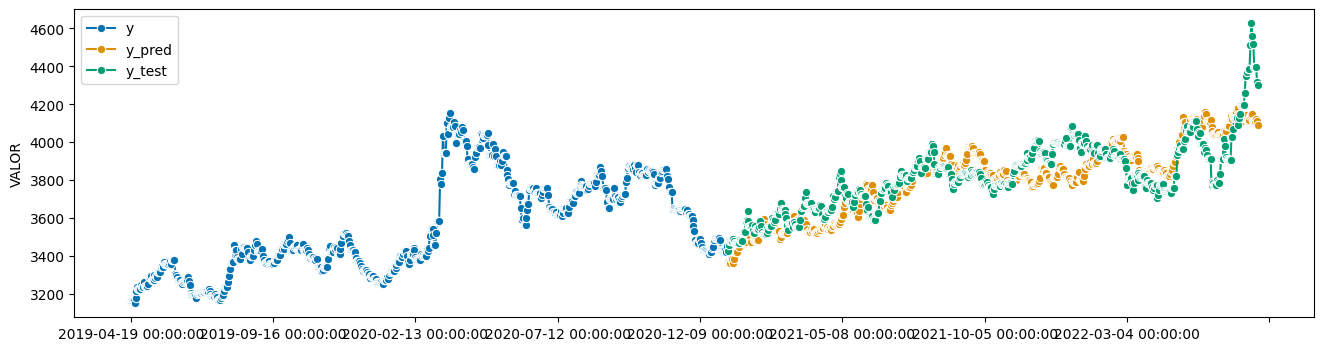

In [185]:
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.performance_metrics.forecasting import MeanAbsolutePercentageError , mean_absolute_percentage_error
x = d.index
X_train2, X_test2, y_train2, y_test2 = train_test_split(x, d['VALOR'], test_size=0.05,shuffle=False)

fh = ForecastingHorizon( pd.DatetimeIndex(pd.date_range("2021-01-07", periods=560, freq="D")), is_relative=False )

mn = np.mean(y_train2)
print(mn)
X = pd.DataFrame(index=X_train2)
forecaster1 = NaiveForecaster(strategy="last", sp=1000)
forecaster2 = NaiveForecaster(strategy="mean", sp=1000)

forecaster1.fit(y_train2, X=X, fh=fh)
forecaster2.fit(y_train2, X=X, fh=fh)

y_pred_fore = forecaster1.predict(X=X)+forecaster2.predict(X=X)/3

print(y_test)
print(y_pred_fore)
plot_series(y_train[10000:], y_pred_fore,y_test ,labels=["y", "y_pred","y_test"])
mean_absolute_percentage_error(y_test, y_pred_fore, symmetric=False)